## Data Source: https://www.kaggle.com/datasets/neuromusic/avocado-prices


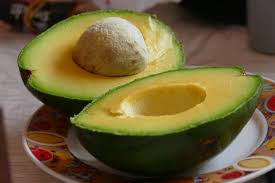

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#pip install prophet

In [3]:
from prophet import Prophet

# **TSF Case Study**

In [5]:
avo=pd.read_csv("avocado.csv")
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avo.shape

(18249, 14)

In [7]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
avo.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
avo=avo.sort_values("Date")

In [10]:
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


# **EDA**

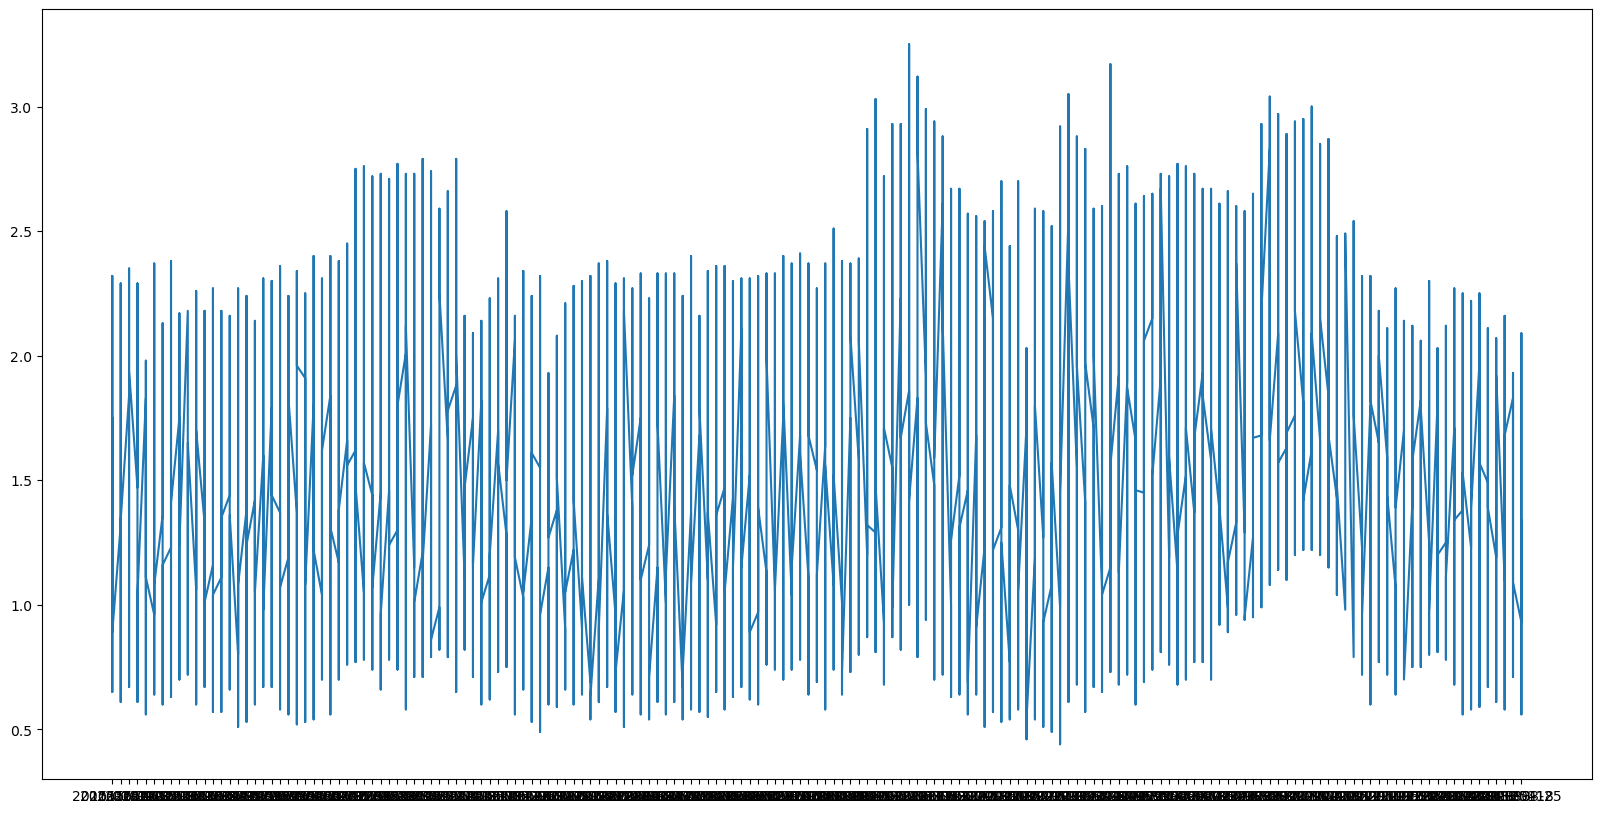

In [11]:
plt.figure(figsize=(20,10))
plt.plot(avo['Date'],avo['AveragePrice'])

<Axes: xlabel='year', ylabel='count'>

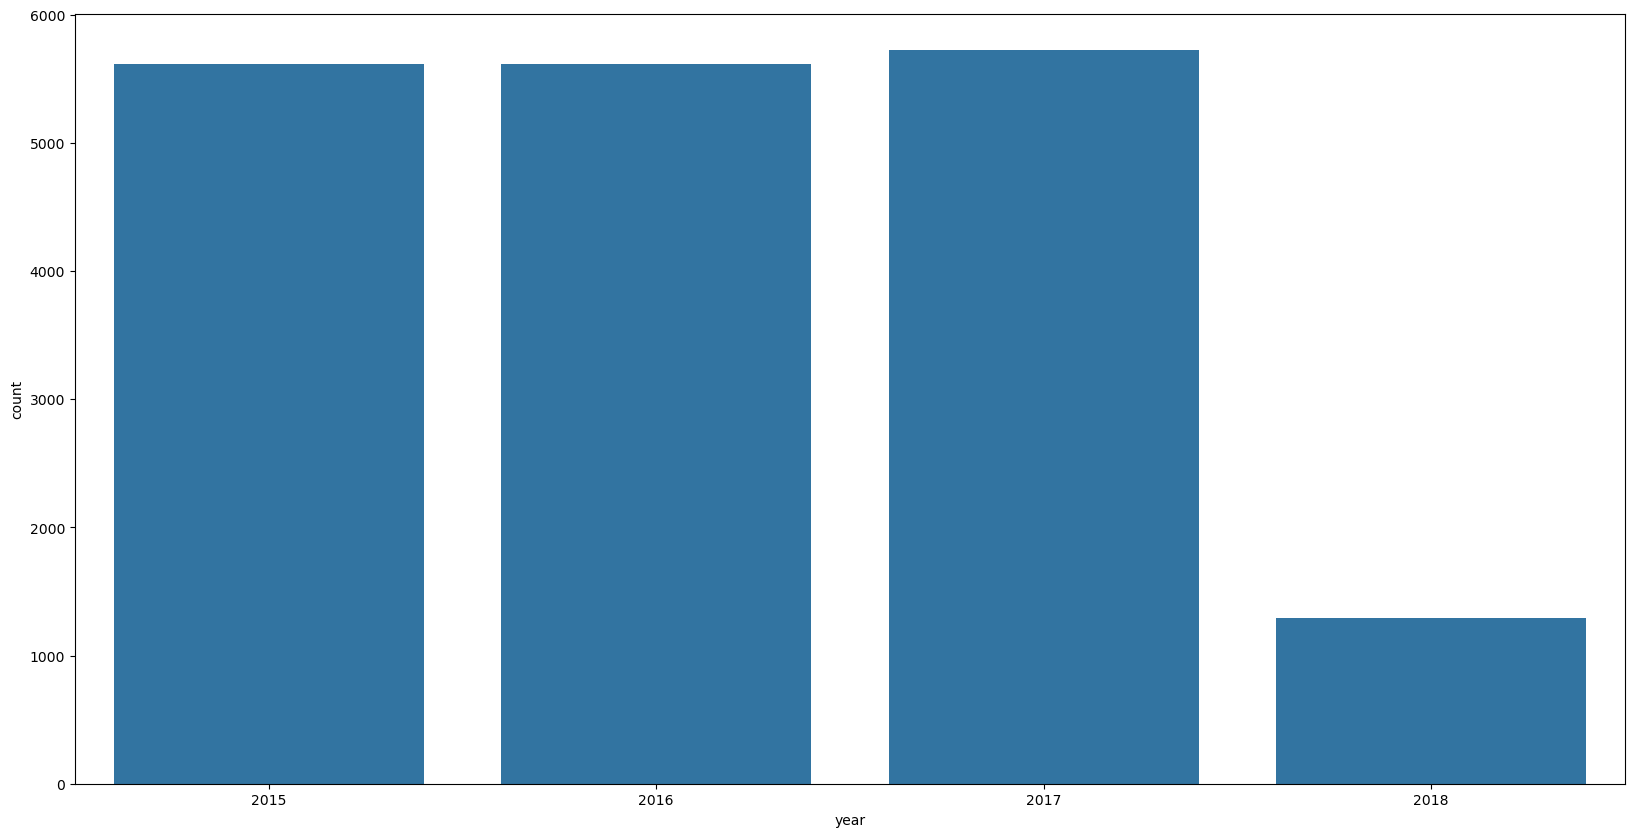

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x='year',data=avo)

# **Pre-processing Data**

In [13]:
avo_prophet=avo[['Date','AveragePrice']]

In [14]:
avo_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [15]:
avo_prophet.columns=['ds','y']

In [16]:
model=Prophet()

In [17]:
model.fit(avo_prophet)

23:04:56 - cmdstanpy - INFO - Chain [1] start processing
23:05:00 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future=model.make_future_dataframe(periods=365)

In [19]:
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [20]:
forecast=model.predict(future)

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500304,0.889104,1.886893,1.500304,1.500304,-0.117910,-0.117910,-0.117910,-0.117910,-0.117910,-0.117910,0.0,0.0,0.0,1.382394
1,2015-01-11,1.494981,0.916069,1.876823,1.494981,1.494981,-0.109398,-0.109398,-0.109398,-0.109398,-0.109398,-0.109398,0.0,0.0,0.0,1.385583
2,2015-01-18,1.489658,0.921250,1.865924,1.489658,1.489658,-0.108945,-0.108945,-0.108945,-0.108945,-0.108945,-0.108945,0.0,0.0,0.0,1.380713
3,2015-01-25,1.484335,0.884603,1.854853,1.484335,1.484335,-0.127679,-0.127679,-0.127679,-0.127679,-0.127679,-0.127679,0.0,0.0,0.0,1.356655
4,2015-02-01,1.479011,0.867672,1.850307,1.479011,1.479011,-0.155659,-0.155659,-0.155659,-0.155659,-0.155659,-0.155659,0.0,0.0,0.0,1.323352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.167023,0.554862,1.626637,0.966596,1.363236,-0.086344,-0.086344,-0.086344,-0.086344,-0.086344,-0.086344,0.0,0.0,0.0,1.080679
530,2019-03-22,1.166297,0.570461,1.612954,0.964559,1.362975,-0.084547,-0.084547,-0.084547,-0.084547,-0.084547,-0.084547,0.0,0.0,0.0,1.081751
531,2019-03-23,1.165571,0.494749,1.608239,0.962521,1.362765,-0.082471,-0.082471,-0.082471,-0.082471,-0.082471,-0.082471,0.0,0.0,0.0,1.083100
532,2019-03-24,1.164845,0.552331,1.614438,0.960483,1.362567,-0.080137,-0.080137,-0.080137,-0.080137,-0.080137,-0.080137,0.0,0.0,0.0,1.084708


In [22]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.080679,0.554862,1.626637
530,2019-03-22,1.081751,0.570461,1.612954
531,2019-03-23,1.083100,0.494749,1.608239
532,2019-03-24,1.084708,0.552331,1.614438
533,2019-03-25,1.086547,0.573273,1.609228


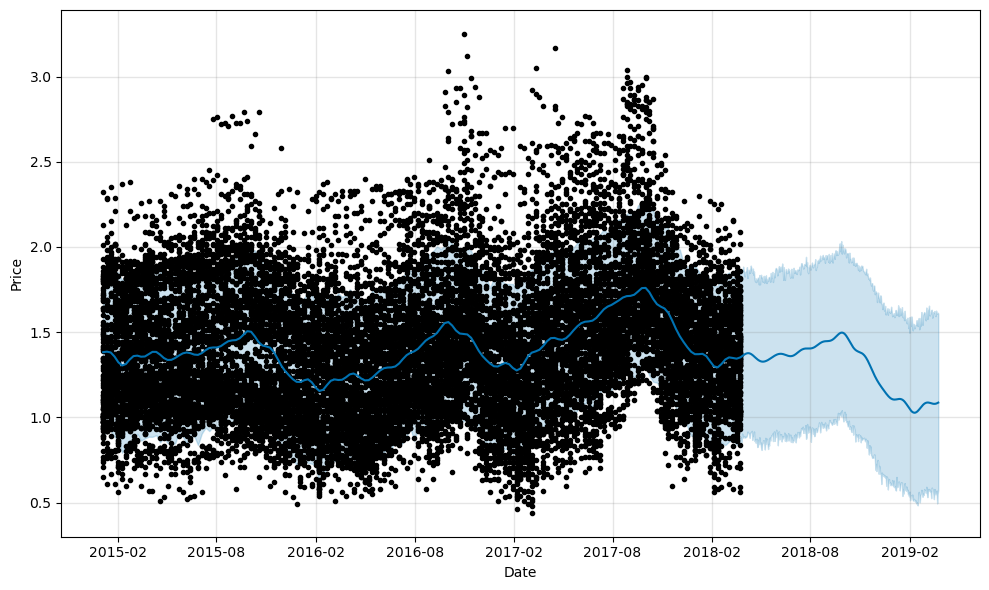

In [23]:
fig_forecast=model.plot(forecast,xlabel='Date',ylabel='Price')

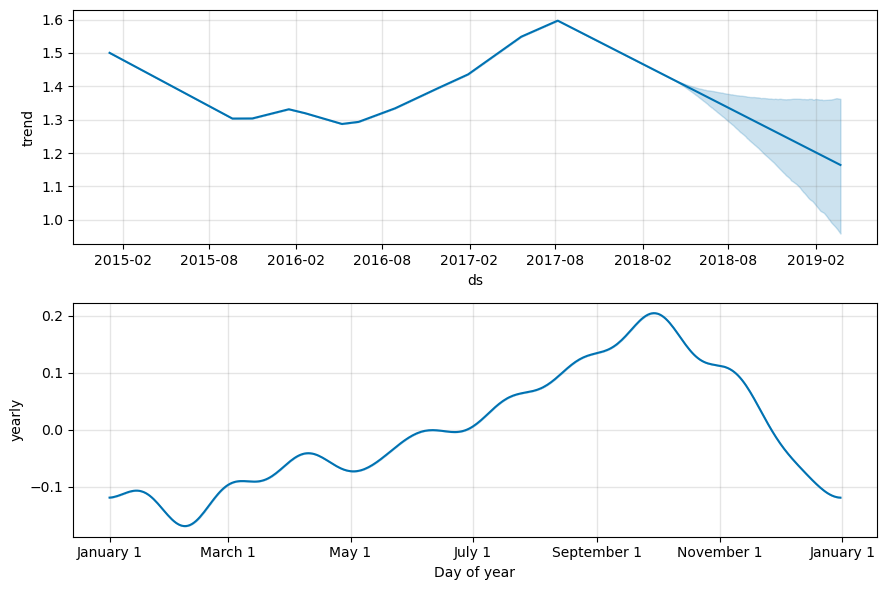

In [24]:
fig_com=model.plot_components(forecast)

 **Avocado season varies by region, but in the Northern Hemisphere, it generally runs from late fall through February.**